In [1]:
import pandas as pd
from tqdm.auto import tqdm
from datetime import timedelta
import numpy as np
import copy
import tushare as ts
from datetime import datetime
from backtest_utils import calculate_vol,calculate_cov,calculate_weight,supporting_data,four_quarters,calculate_daily_returns
from backtest_utils import calculate_performance_metrics,plot_cumulative_returns,plot_etf_returns,cal_asset
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
tqdm.pandas()
ts.set_token('6ddb307225c1b26eaabecc4e76561c9305d5bcad10bb6b882a3e63df')
pro = ts.pro_api()
start_dt = '20190101'
end_dt = '20240701'
test_dt = '20200101'
vol_day = 180

In [2]:
'''
data = pd.DataFrame()
stock_list = ['510300.SH','510500.SH','513500.SH','513660.SH','511010.SH','511260.SH','518880.SH','510170.SH','159985.SZ']
stocks = stock_list
for stock in stock_list:
    df = pro.fund_daily(ts_code=stock, start_date=start_dt, end_date=end_dt)
    data  = pd.concat([data, df], ignore_index=True)
data.to_csv("etf.csv")
'''

'\ndata = pd.DataFrame()\nstock_list = [\'510300.SH\',\'510500.SH\',\'513500.SH\',\'513660.SH\',\'511010.SH\',\'511260.SH\',\'518880.SH\',\'510170.SH\',\'159985.SZ\']\nstocks = stock_list\nfor stock in stock_list:\n    df = pro.fund_daily(ts_code=stock, start_date=start_dt, end_date=end_dt)\n    data  = pd.concat([data, df], ignore_index=True)\ndata.to_csv("etf.csv")\n'

In [3]:
data = pd.read_csv('etf.csv')
data = data.sort_values(by = ['ts_code','trade_date'],ascending = True)
#data['pct_chg']=data['pct_chg']/100
original_data = data
stocks = ['510300.SH','510500.SH','513500.SH','513660.SH','511010.SH','511260.SH','518880.SH','510170.SH','159985.SZ']

In [4]:
"""
trade_cal_SSE = pro.trade_cal(exchange='SSE', start_date=test_dt, end_date=end_dt, is_open=1)
trade_date = trade_cal_SSE['cal_date']
trade_date = trade_date[::-1]
trade_date.to_csv('trade_dates.csv', index=False)
"""
trade_date = pd.read_csv('trade_dates.csv')
trade_date = trade_date['cal_date'].astype(str)

In [5]:
bond_rate = pd.read_csv('bond_rate.csv')
bond_rate = bond_rate.set_index('trade_date')
bond_rate = bond_rate['close']
bond_rate.index = pd.to_datetime(bond_rate.index,format = '%Y%m%d')
bond_rate = bond_rate.reindex(trade_date, method='ffill')

In [6]:
data,leverage = calculate_vol(data,0.6,trade_date,vol_day)

['159985.SZ', '510170.SH', '510300.SH', '510500.SH', '511010.SH', '511260.SH', '513500.SH', '513660.SH', '518880.SH']


  0%|          | 0/9 [00:00<?, ?it/s]

In [7]:
print(leverage)

{('159985.SZ', '20200102'): 1.0877661166946617, ('159985.SZ', '20200103'): 1.1155840624485087, ('159985.SZ', '20200106'): 1.1225576950720069, ('159985.SZ', '20200107'): 1.1073199173814685, ('159985.SZ', '20200108'): 1.133310461444628, ('159985.SZ', '20200109'): 1.1496095348176882, ('159985.SZ', '20200110'): 1.1480653858610406, ('159985.SZ', '20200113'): 0.9999085770769833, ('159985.SZ', '20200114'): 0.9930301908171802, ('159985.SZ', '20200115'): 1.0053793073224888, ('159985.SZ', '20200116'): 0.9351225353708761, ('159985.SZ', '20200117'): 0.9500290406657192, ('159985.SZ', '20200120'): 0.9658408841660818, ('159985.SZ', '20200121'): 0.9814085689944824, ('159985.SZ', '20200122'): 0.9564760723432104, ('159985.SZ', '20200123'): 0.9272358525250377, ('159985.SZ', '20200203'): 0.9168617584469624, ('159985.SZ', '20200204'): 0.7991674738274159, ('159985.SZ', '20200205'): 0.7063069607149345, ('159985.SZ', '20200206'): 0.7156125229249134, ('159985.SZ', '20200207'): 0.7246821453654497, ('159985.SZ',

In [8]:
stock_weights,date_weights,date_stocks = supporting_data(data,trade_date,stocks,vol_day)

  0%|          | 0/1088 [00:00<?, ?it/s]

In [9]:
daily_returns,net_values,position_change,holdings_diffs,stock_earnings,stock_list = calculate_daily_returns(leverage,data,date_stocks,date_weights,1e6,0.00015,0.04,bond_rate,trade_date)

计算日收益:   0%|          | 0/1088 [00:00<?, ?it/s]

-7473.639570572879
-1742.5704901325516
-3594.514485790045
1350.9434978517238
300.6142115687253
1936.77141898626
-1626.1618979935301
334.8349854560802
1426.492304636864
2129.3720391436946
-2206.05984690669
-1959.534499650821
-5754.862111938186
5108.025412355084
968.2720895691309
3946.451223387732
686.6805102863582
2292.8119413296226
2484.3410272984765
3896.495435316814
-2211.325627013226
3156.459289799561
-3458.014192746952
331.217512403382
1308.6506175748073
815.2584434768651
-3772.166335047339
-1182.9251323818462
338.815604121075
-8684.572389604058
-8.210372130735777
169.71309876907617
5218.229284215951
-3413.5185283536557
-7723.577651746455
2153.061735735275
-3419.441204729723
-7205.984849194181
-6195.373169502127
-7653.316962710815
-3205.137998942053
-4146.902877770597
-4280.602690145373
9376.744715067325
6247.877350335009
8324.159920665552
-2691.5351547524333
1679.2714605687652
-312.7709259712137
702.0866223147605
-5050.7522194067715
2034.8505040657474
-2525.327070789179
8971.35420

-9763.760863669915
-3574.9955849682447
-1669.217966603348
2978.378723183181
4386.625352990581
-279.5433536141645
-3188.8111076056957
4365.730103430571
-3305.3421030528843
-3621.5694408572745
-1529.329443122493
3753.0618445412256
-4004.0002885553986
-41.58033523336053
-5473.182783863973
-2097.495514660841
-4885.231403487967
-3038.16117158602
1016.4355273356196
3210.4220730883535
-6704.751296412898
-21466.23683065106
16515.622541848337
8581.398388606962
5747.179900818039
-736.5355561915785
4427.55716168927
3439.4020167472772
-1779.7223831913434
-4182.214964333456
-679.4860696154647
-436.8569176320452
2584.9666621095967
-3249.243363966234
-2804.8564205090515
2670.724546560319
-3982.5186191040557
3939.8034436993767
-5979.774450011784
2541.2240572366863
-622.8971901263576
4466.99094338459
-2263.9652819079347
-2335.976606292883
1429.384054916678
-2483.756343442714
-1195.3139365634415
-1313.1641843970865
-125.31636792770587
2885.5662484127097
3303.359236074146
7726.3638979957905
-251.30209754

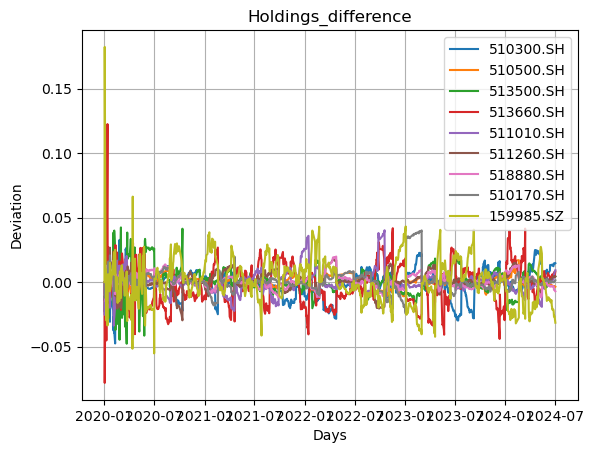

In [10]:
trade_date = pd.to_datetime(trade_date, format='%Y%m%d')
plt.plot(trade_date,holdings_diffs,label=stocks)
plt.title('Holdings_difference')
plt.xlabel('Days')
plt.ylabel('Deviation')
plt.grid(True)
plt.legend()
plt.show()

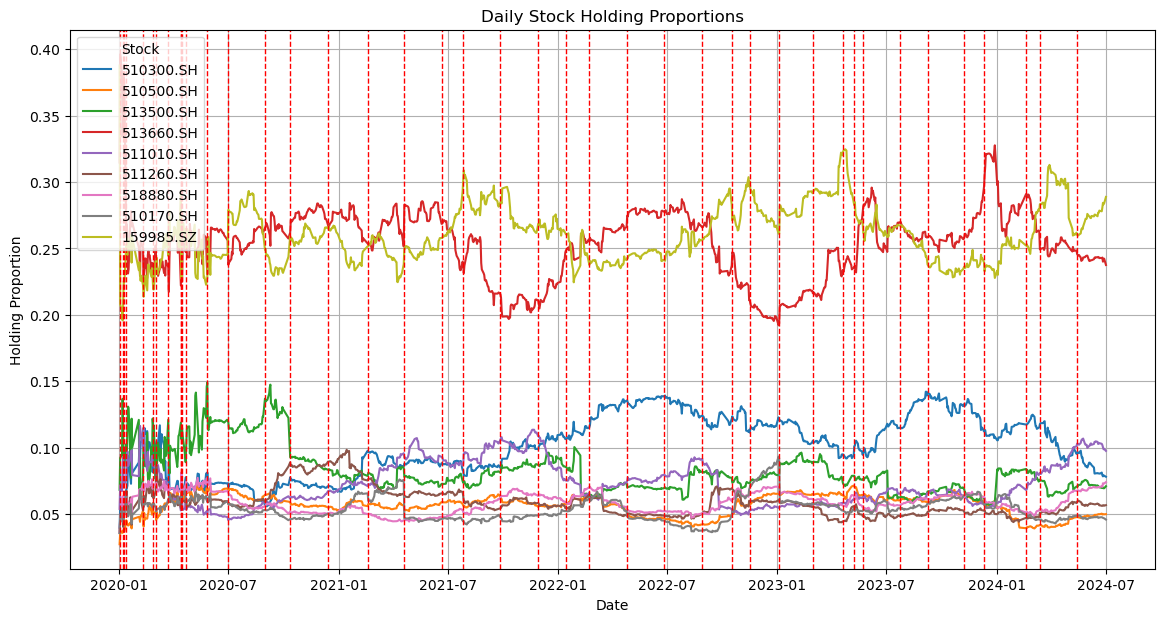

In [11]:
# 绘制折线图
plt.figure(figsize=(14, 7))
for stock, weights in stock_weights.items():
    plt.plot(trade_date, weights, label=stock)
plt.legend(title='Stock')

for change_date in position_change:
    change_date = pd.to_datetime(change_date, format='%Y%m%d')
    plt.axvline(change_date, color='red', linestyle='--', linewidth=1)
# 添加标题和轴标签
plt.title('Daily Stock Holding Proportions')
plt.xlabel('Date')
plt.ylabel('Holding Proportion')
plt.grid(True)

plt.savefig('stock_holdings_proportions_2.png', format='png', dpi=300)
# 显示图表
plt.show()

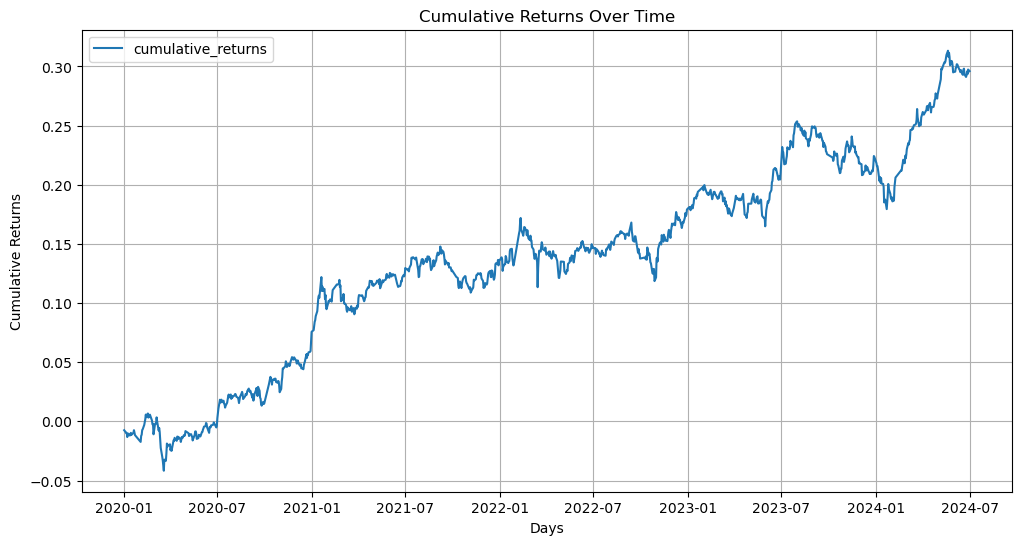

In [12]:
plot_cumulative_returns(daily_returns,trade_date)


In [13]:
win_rate, sharpe_ratio, max_drawdown = calculate_performance_metrics(daily_returns)

print(f"Win Rate: {win_rate}")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Max Drawdown: {max_drawdown}")

Win Rate: 0.5284926470588235
Sharpe Ratio: 1.1379332835188594
Max Drawdown: 0.07417603919013982


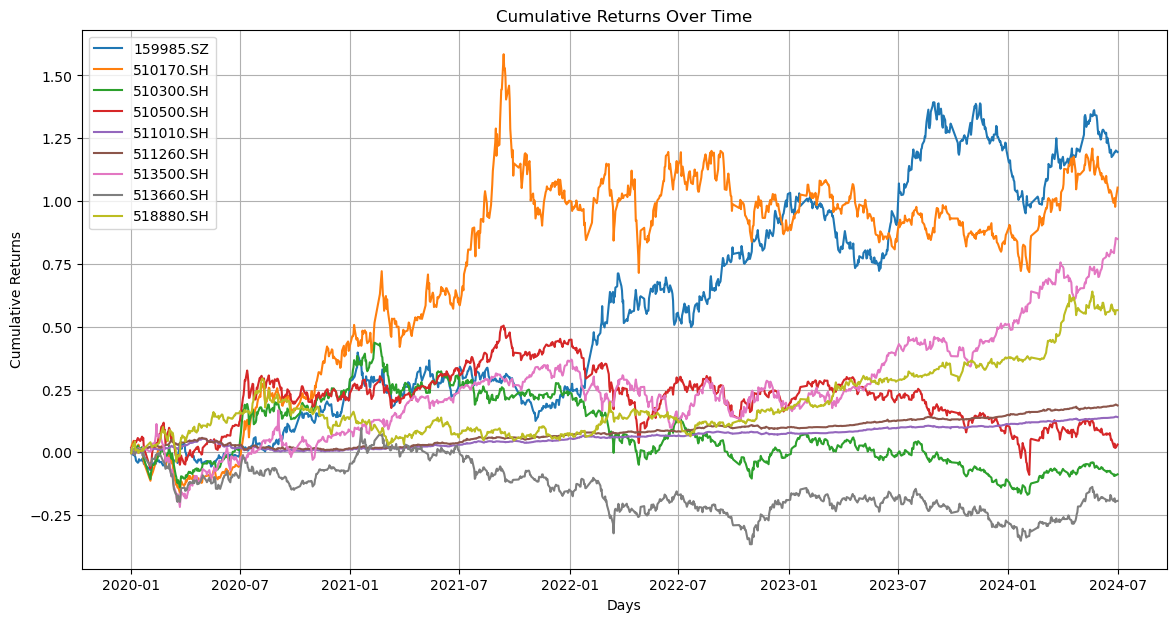

In [14]:
data =pd.read_csv('etf.csv')
plot_etf_returns(data,test_dt)

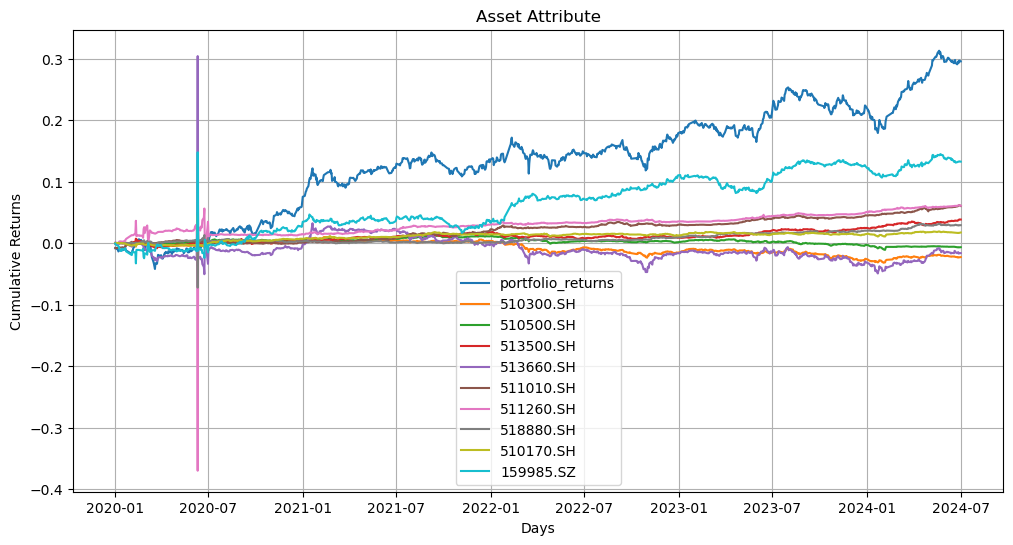

In [15]:
cal_asset(daily_returns,stock_earnings,stock_list,trade_date)